# File input/output with scipy.io

* Loading and saving matlab filese

In [199]:
import numpy as np
from scipy import io as spio

a = np.ones((3,3))
spio.savemat('file.mat', {'a':a}) ## savemat expects a dictionary

data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

* Reading from tab-delimited files

In [200]:
import numpy as np
data = np.genfromtxt('input.tsv', dtype=['S3', 'i8', 'i8', 'S10'],
                    delimiter='\t', names=True)
data

array([(b'HSV', 21, 11, b'My favorit'), (b'FCB', 20, 10, b'Well, o.k.'),
       (b'BVB', 19, 11, b"It's cool!")],
      dtype=[('Team', 'S3'), ('Score', '<i8'), ('Goals', '<i8'), ('Note', 'S10')])

# Special functions: _scipy.special_

Special functions are transcendental functions. I will explore their properties later.

* [Bessel function](https://en.wikipedia.org/wiki/Bessel_function), such as _scipy.special.jn_
* [Elliptic function](https://en.wikipedia.org/wiki/Elliptic_function), such as _scipy.special.ellipj_
* [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), such as _scipy.special.gamma_ and _scipy.special.gammaln_.
* [Error function](http://en.wikipedia.org/wiki/Error_function), or Erf, the area under a Gausian curve, _scipy.special.erf_.

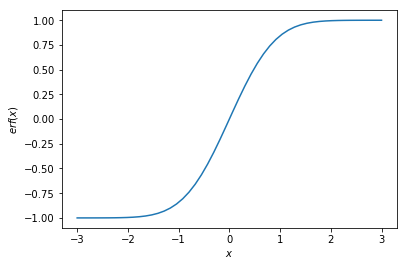

In [201]:
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

# Linear algebra

The module _scipy.linalg_ provides standard linear algebra operations.

* Determinant of a square matrix

In [202]:
from scipy import linalg

arr = np.array([[5,6],
                [1,2]])
linalg.det(arr)

4.0

In [203]:
arr2 = np.array([[3,4],
                 [6,8]])
linalg.det(arr2)

0.0

* Inverse of a square matrix

In [204]:
arr = np.array([[1,2],
                [3,4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [205]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

* Singular-value decomposition

In [206]:
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
arr

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [207]:
urr, spec, vharr = linalg.svd(arr)
## array spectrum (eigenvectors)
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [208]:
## verify the SVD decomposition
sarr = np.diag(spec)
svd_mat = urr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

# Fast Fourier Transformations (FFT)

In [209]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi/period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

pidxs = np.where(sample_freq>0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

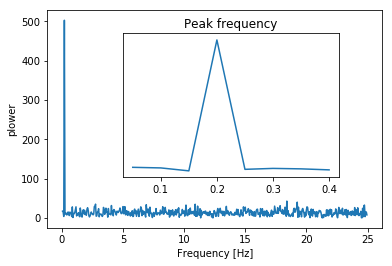

In [210]:
## visualise the signal FFT
import pylab as pl

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])
pl.show()

In [211]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


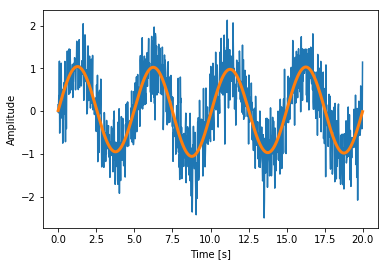

In [212]:
## remove high-frequency noise
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

## Crude periodicity

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


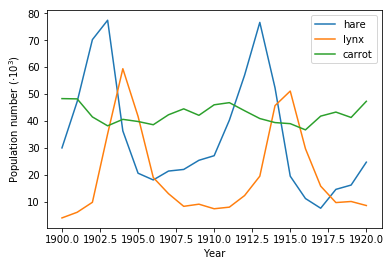

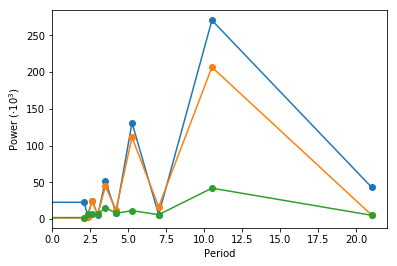

In [213]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("../1.3/data/populations.txt")
years = data[:,0]
populations = data[:,1:]

ft_populations = np.fft.fft(populations, axis=0)
frequences = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequences

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare','lynx','carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o-')
plt.xlim(0,22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.


## Gaussian blur

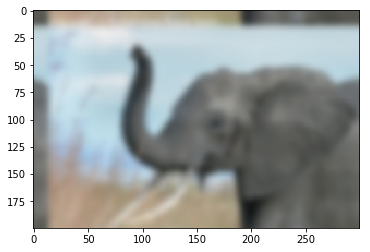

In [214]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy import ndimage

## read image
img = plt.imread('./elephant.png')

## 1D guassian convolution model
t = np.linspace(-10, 10, 30)
bump = np.exp(-.1*t**2)
bump /= np.trapz(bump) ## normalise the integral to 1

## np.trapz: Integrate along the given axis using the composite trapezoidal rule.

## make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis,:]

## FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0,1))

## convolve
img_ft = fftpack.fft2(img, axes=(0,1))
img2_ft = kernel_ft[:,:, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0,1)).real

## clip values to range
img2 = np.clip(img2, 0, 1)

## plot output
plt.imshow(img2)
plt.show()

## Moon landing

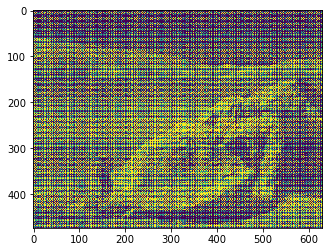

In [215]:
img = plt.imread('./moonlanding.png')

plt.imshow(img)
plt.show()

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


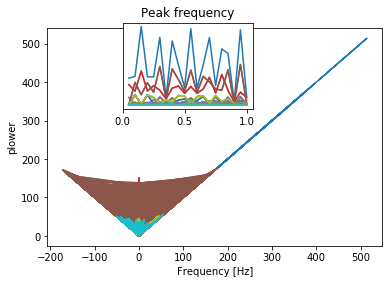

In [216]:
img_fft = fftpack.fft(img)

power = np.abs(img_fft)

pl.figure()
pl.plot(img_fft, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.6, 0.3, 0.3])
pl.title('Peak frequency')
pl.plot(freqs[:20], power[:20])
pl.setp(axes, yticks=[])
pl.show()

# Optimization

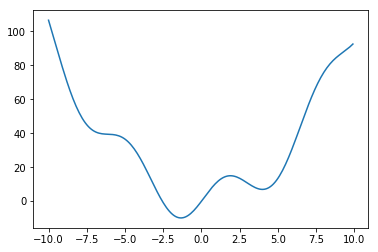

In [217]:
from scipy import optimize

def fun(x):
    return x ** 2 + np.sin(x) * 12

x = np.arange(-10, 10, 0.1)
plt.plot(x, fun(x))
plt.show()

In [218]:
## gradient descent with BFGS
optimize.fmin_bfgs(fun, 0)

Optimization terminated successfully.
         Current function value: -9.886369
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


array([-1.34475105])

In [219]:
## ATTENTION: local maxima possible
optimize.fmin_bfgs(fun, 3, disp=0)

array([ 3.98582594])

In [220]:
## basin hopping: global search
optimize.basinhopping(fun, 0)

                        fun: -9.886369013642671
 lowest_optimization_result:       fun: -9.886369013642671
 hess_inv: array([[ 0.07300824]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.34475106])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1536
                        nit: 100
                       njev: 512
                          x: array([-1.34475106])

In [221]:
## Local minimal with optimize.fminbound
xmin_local = optimize.fminbound(fun, 0, 10)
xmin_local

3.9858256387196884

## Find roots

Use optimize.root to identify roots of a function will only reveal one root near the initial guess. See the example below

In [222]:
## find roots
root = optimize.root(fun, 1) ## 1: initial guess
root

    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.26649153e-30])
       r: array([-12.])
  status: 1
 success: True
       x: array([ 0.])

In [223]:
## another root
root2 = optimize.root(fun, -3)
root2

    fjac: array([[-1.]])
     fun: array([  1.32960309e-12])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([ -2.28508714e-07])
       r: array([ 15.16903836])
  status: 1
 success: True
       x: array([-2.56255081])

## Curve fitting

In [224]:
xdata = np.linspace(-10, 10, num=200)
ydata = fun(xdata) + np.random.randn(xdata.size)
def fun2(x, a, b):
    return a * x**2 + b * np.sin(x)

fitInit = [2,1]
params, params_covariance = optimize.curve_fit(fun2, xdata, ydata, fitInit)

In [225]:
params_covariance

array([[  2.47666492e-06,   5.26609183e-13],
       [  5.26609183e-13,   1.06082928e-02]])

In [226]:
params

array([  1.0031829 ,  12.19076222])

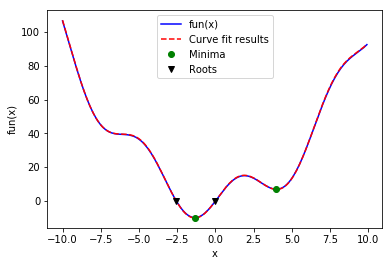

In [227]:
## plot curve_fit results

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, fun(x), 'b-', label="fun(x)")
ax.plot(x, fun2(x, *params), 'r--', label="Curve fit results")
xmin_global = optimize.basinhopping(fun, 0).x[0]
xmins = np.array([xmin_global, xmin_local])
ax.plot(xmins, fun(xmins), 'go', label="Minima")
roots = np.array([root.x, root2.x])
ax.plot(roots, fun(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('fun(x)')
plt.show(fig)

## Temperature data

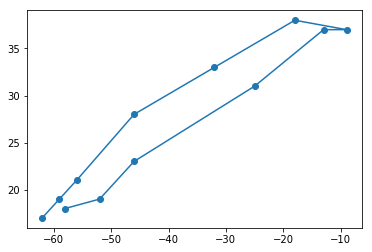

In [228]:
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

plt.plot(min_temp, max_temp, 'o-')
plt.show()

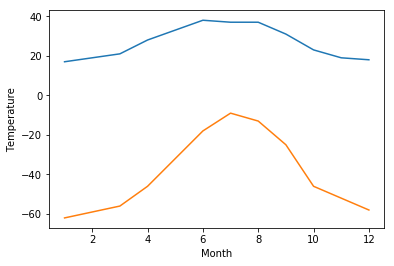

In [229]:
plt.plot(np.arange(1, max_temp.size+1), max_temp)
plt.plot(np.arange(1, min_temp.size+1), min_temp)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

## TO-DO: 2D optimisation

# Statistics and random numbers with _scipy.stats_

## Histogram

In [230]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5, 0.25)

In [231]:
histogram = np.histogram(a, bins, normed=True)[0]
histogram

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.008,  0.024,  0.044,
        0.076,  0.072,  0.188,  0.232,  0.292,  0.3  ,  0.36 ,  0.392,
        0.428,  0.316,  0.312,  0.232,  0.228,  0.212,  0.136,  0.052,
        0.052,  0.028,  0.008,  0.004,  0.004,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ])

In [232]:
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.875, -3.625, -3.375, -3.125, -2.875, -2.625, -2.375, -2.125,
       -1.875, -1.625, -1.375, -1.125, -0.875, -0.625, -0.375, -0.125,
        0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,  1.875,
        2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,  3.875,
        4.125,  4.375,  4.625])

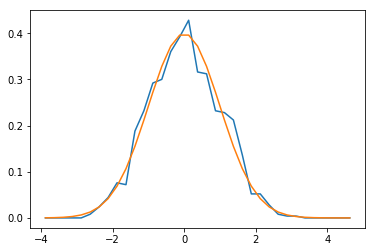

In [233]:
from scipy import stats
b = stats.norm.pdf(bins) 

plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

Maximum-likelihood estimation of the parameters

In [234]:
loc, std = stats.norm.fit(a)
loc

0.022360219430135379

In [235]:
std

0.99733548781705106

## Gamma distribution

In [236]:
gr = np.random.gamma(shape=1, size=1000)

In [237]:
bins = np.arange(-1, 5, 0.25)
grHist = np.histogram(gr, bins, normed=True)[0]
midbins = 0.5*(bins[1:] + bins[:-1])
expGr = stats.gamma.pdf(midbins, 1)

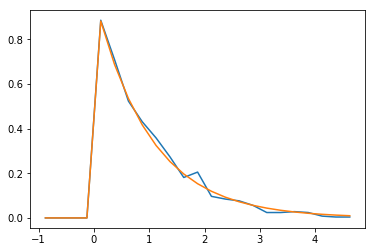

In [238]:
plt.plot(midbins, grHist)
plt.plot(midbins, expGr)
plt.show()

In [239]:
meShape, meLoc, meScale=stats.gamma.fit(gr, fscale=1)

In [240]:
meShape

0.98288788059925158

## Percentiles

In [241]:
np.median(a)

0.0043396050600961527

In [242]:
stats.scoreatpercentile(a, 50) # 50% quantile

0.0043396050600961527

In [243]:
stats.scoreatpercentile(a, 90) # 90% quantile

1.321419037028825

## Statistical tests

In [244]:
np.random.seed(1887)

a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-4.0226342001157747, pvalue=0.00010697450556685758)

# Interpolation

In [245]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

from scipy.interpolate import interp1d # linear 

# linear interpolation
linear_interp = interp1d(measured_time, measures)
computed_time = np.linspace(0, 1, 80)
linear_results = linear_interp(computed_time)

# cubic
cubic_interp = interp1d(measured_time, measures, kind="cubic")
cubic_results = cubic_interp(computed_time)

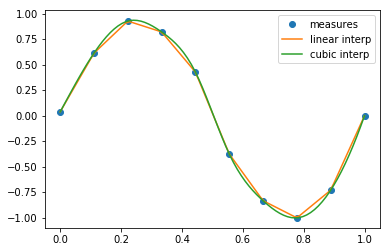

In [246]:
plt.plot(measured_time, measures, 'o', ms=6, label="measures")
plt.plot(computed_time, linear_results, label="linear interp")
plt.plot(computed_time, cubic_results, label="cubic interp")
plt.legend()
plt.show()

# Numerical integration

In [247]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

True

In [248]:
np.allclose(err, 1 - res)

True

In [249]:
## first-order ODE
def calc_derivative(ypos, time, counter):
    counter += 1
    return -2 * ypos

counter = np.zeros((1,), dtype=np.uint16)

from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec,
                    args=(counter,), full_output=True)

In [250]:
counter ## the derivative function has been called more than one time

array([129], dtype=uint16)

In [251]:
## the cumulative number of iterations for each of the first 10 time steps
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

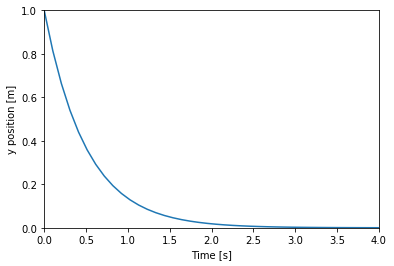

In [252]:
## plot the solution
plt.plot(time_vec, yvec)
plt.xlim(0,4)
plt.ylim(0,1)
plt.xlabel('Time [s]')
plt.ylabel('y position [m]')
plt.show()

In [253]:
## an example of damped spring-mass oscillator
mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m

## eps < 1 => undamped
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
eps < 1

True

In [254]:
nu_coef = cviscous / mass # nu
om_coef = kspring / mass # Omega
def calc_deri(yvec, time, nu, om):
    return (yvec[1], -nu * yvec[1] - om*yvec[0])
time_vec = np.linspace(0, 15, 1000)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(nu_coef, om_coef))

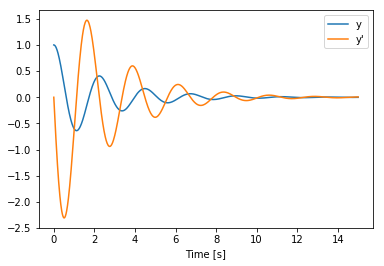

In [255]:
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.xlabel("Time [s]")
plt.legend()
plt.show()

# Signal processing

In [256]:
from scipy import signal

## Remove linear trend from signal

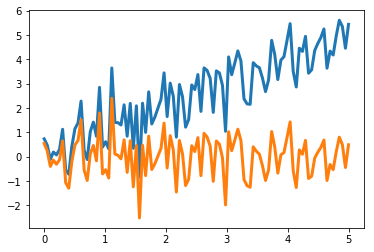

In [257]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

plt.plot(t, x, linewidth=3)
plt.plot(t, signal.detrend(x), linewidth=3)
plt.show()

## Resample a signal to n points

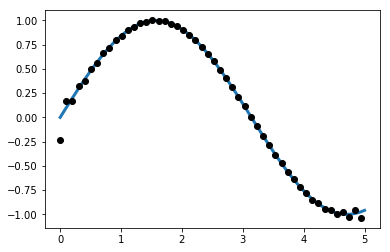

In [258]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

plt.plot(t, x, linewidth=3)
plt.plot(t[::2], signal.resample(x, 50), 'ko')
plt.show()

# Image processing

In [259]:
from scipy import ndimage

In [260]:
## geometrical transformation
from scipy import misc
face = misc.face(gray=True)

shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 60)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

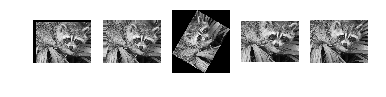

In [261]:
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [262]:
## image filtering
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # cropout square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5,5))

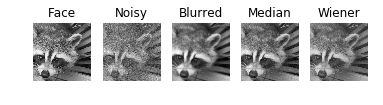

In [263]:
plt.subplot('151')
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Face')
plt.subplot('152')
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Noisy')
plt.subplot('153')
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Blurred')
plt.subplot('154')
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Median')
plt.subplot('155')
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Wiener')
plt.show()

# Mathematical morphology

In [264]:
el = ndimage.generate_binary_structure(2, 1) ## structuring element of Swiss flag
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]], dtype=bool)

In [267]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

## Erosion

In [269]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [272]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [273]:
#Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])